<a href="https://colab.research.google.com/github/maxreynolds/Pattern-Cloud/blob/main/Dataset_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install datasets[vision]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 10.0 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset_builder, load_dataset, Image
ds_builder = load_dataset_builder("beans")
ds_builder.info.description

'Beans is a dataset of images of beans taken in the field using smartphone\ncameras. It consists of 3 classes: 2 disease classes and the healthy class.\nDiseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated\nby experts from the National Crops Resources Research Institute (NaCRRI) in\nUganda and collected by the Makerere AI research lab.\n'

In [ ]:
ds_builder.info.features

{'image_file_path': Value(dtype='string', id=None),
 'image': Image(decode=True, id=None),
 'labels': ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)}

In [ ]:
from datasets import load_dataset, Image
dataset = load_dataset("beans", split="train")


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1034 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/133 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/128 [00:00<?, ? examples/s]

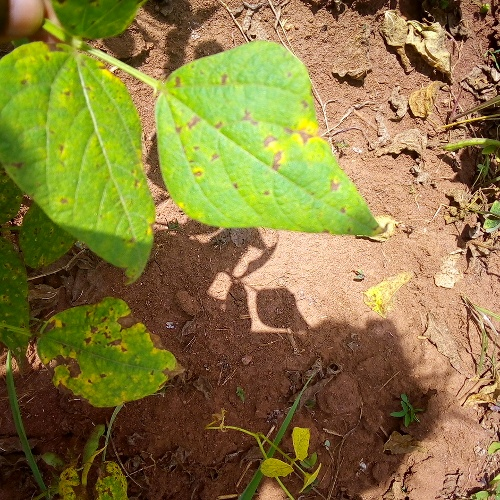

In [ ]:
dataset[0]["image"]


In [ ]:
ds_builder = load_dataset_builder("Multimodal-Fatima/CIFAR10_train")
ds_builder.info.features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], id=None),
 'id': Value(dtype='int64', id=None),
 'clip_tags_LAION_ViT_H_14_2B_simple_specific': Value(dtype='string', id=None),
 'clip_tags_LAION_ViT_H_14_2B_ensemble_specific': Value(dtype='string', id=None),
 'clip_tags_ViT_L_14_simple_specific': Value(dtype='string', id=None),
 'Attributes_LAION_ViT_H_14_2B_descriptors_text_davinci_003_full': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'Attributes_ViT_L_14_descriptors_text_davinci_003_full': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [ ]:
dataset_cifar10 = load_dataset("Multimodal-Fatima/CIFAR10_train", split="train")
dataset_cifar10.info.features

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], id=None),
 'id': Value(dtype='int64', id=None),
 'clip_tags_LAION_ViT_H_14_2B_simple_specific': Value(dtype='string', id=None),
 'clip_tags_LAION_ViT_H_14_2B_ensemble_specific': Value(dtype='string', id=None),
 'clip_tags_ViT_L_14_simple_specific': Value(dtype='string', id=None),
 'Attributes_LAION_ViT_H_14_2B_descriptors_text_davinci_003_full': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'Attributes_ViT_L_14_descriptors_text_davinci_003_full': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

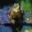

In [ ]:
dataset_cifar10[100]["image"]


In [ ]:
dataset_cifar10 = dataset_cifar10.rename_column('clip_tags_LAION_ViT_H_14_2B_simple_specific','text')

dataset_cifar10.info.features


{'image': Image(decode=True, id=None), 'text': Value(dtype='string', id=None)}

In [ ]:
def transforms(examples):
    examples["pixel_values"] = [image.convert("RGB").resize((512,512)) for image in examples["image"]]
    return examples

dataset = dataset.map(transforms, remove_columns=["image"], batched=True)
dataset[0]

Map:   0%|          | 0/1034 [00:00<?, ? examples/s]

{'image_file_path': '/root/.cache/huggingface/datasets/downloads/extracted/b0a21163f78769a2cf11f58dfc767fb458fc7cea5c05dccc0144a2c0f0bc1292/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg',
 'labels': 0,
 'pixel_values': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>}

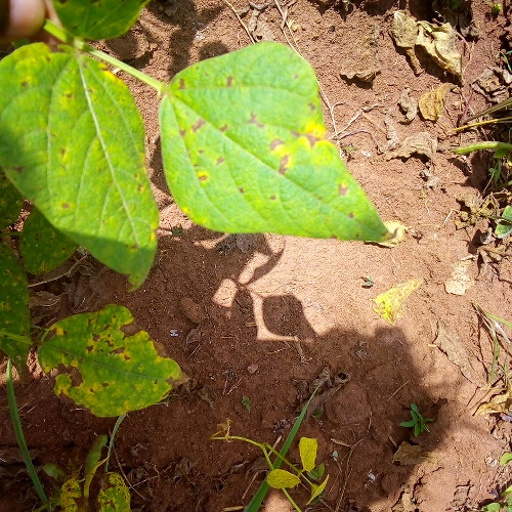

In [ ]:
dataset[0]["pixel_values"]

In [ ]:
dataset.info.features


{'image_file_path': Value(dtype='string', id=None),
 'labels': ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None),
 'pixel_values': Image(decode=True, id=None)}

In [ ]:
dataset[2]["labels"]

0

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

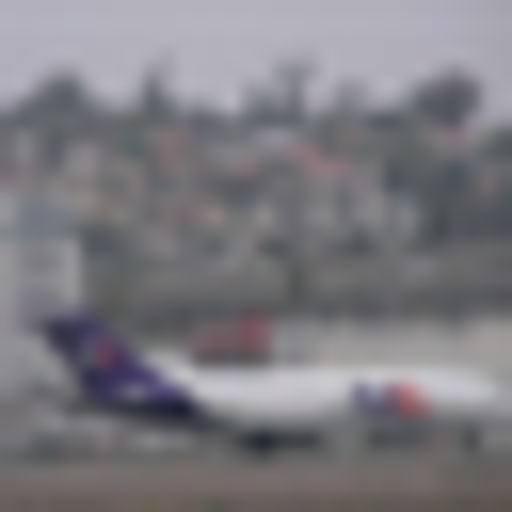

In [ ]:
def transforms(examples):
    examples["pixel_values"] = [image.convert("RGB").resize((512,512)) for image in examples["img"]]
    return examples

dataset_cifar10 = dataset_cifar10.map(transforms, remove_columns=["img"], batched=True)
dataset_cifar10[0]["pixel_values"]

In [ ]:
#Logging into Hugging Face so we can save the model to our profile
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
dataset_cifar10.push_to_hub("MaxReynolds/cifar10_TextLabels")

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/500 [00:00<?, ?ba/s]